In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('heart (1).csv')

In [8]:
df.max()

Age                77
Sex                 M
ChestPainType      TA
RestingBP         200
Cholesterol       603
FastingBS           1
RestingECG         ST
MaxHR             202
ExerciseAngina      Y
Oldpeak           6.2
ST_Slope           Up
HeartDisease        1
dtype: object

In [9]:
df.min()

Age                 28
Sex                  F
ChestPainType      ASY
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG         LVH
MaxHR               60
ExerciseAngina       N
Oldpeak           -2.6
ST_Slope          Down
HeartDisease         0
dtype: object

In [10]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [11]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [14]:
for n,col in zip(df.nunique(),df.nunique().index):
    print(f"{col} has {n} unique value")

Age has 50 unique value
Sex has 2 unique value
ChestPainType has 4 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
RestingECG has 3 unique value
MaxHR has 119 unique value
ExerciseAngina has 2 unique value
Oldpeak has 53 unique value
ST_Slope has 3 unique value
HeartDisease has 2 unique value


In [15]:
df.shape

(918, 12)

In [16]:
df.dropna().shape

(918, 12)

In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [19]:
categorical_cols= df.select_dtypes(include=['object'])

In [20]:
for cols in categorical_cols.columns:
    print(cols,':', len(categorical_cols[cols].unique()),'labels')

Sex : 2 labels
ChestPainType : 4 labels
RestingECG : 3 labels
ExerciseAngina : 2 labels
ST_Slope : 3 labels


In [21]:
df['Sex'] = np.where(df['Sex'] == "F", 0, 1)
df['ExerciseAngina'] = np.where(df['ExerciseAngina'] == "N", 0, 1)

In [22]:
df=pd.get_dummies(df)

In [23]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [24]:
df.shape

(918, 19)

In [25]:
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

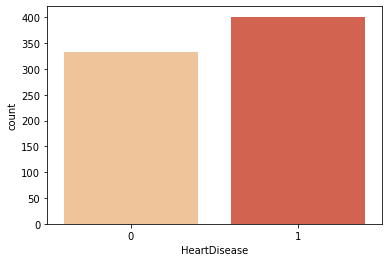

In [27]:
import seaborn as sns
sns.countplot(y_train,palette='OrRd')

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Logistic regression

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        83
           1       0.86      0.91      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



confusion matrix for logistic regression


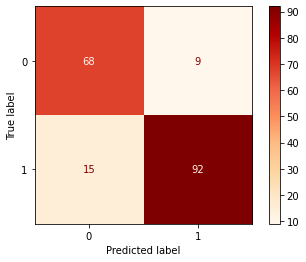

In [29]:
#logistic regression
lr = LogisticRegression()
model1=lr.fit(X_train, y_train)
lrpred = lr.predict(X_test)
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.OrRd , values_format='d')

# Random Forest

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        82
           1       0.86      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



confusion matrix for random forest classifier


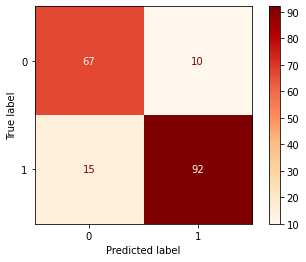

In [30]:
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, X_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

# GradientBoostingClassifier



classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



confusion matrix for gradient boosting classifier


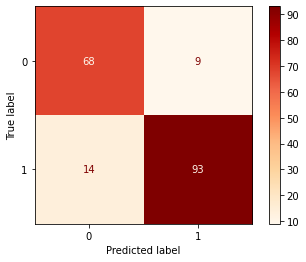

In [31]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model6=gbm.fit(X_train, y_train)
gbmpred = gbm.predict(X_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, X_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

# Performance Tuning

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = { 
    'n_estimators': [50,100,200, 300,400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [27]:
# CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5,n_jobs=-1,verbose=3)
# CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=3)

In [28]:
# CV_rfc.best_params_

# {'criterion': 'entropy',
#  'max_depth': 6,
#  'max_features': 'auto',
#  'n_estimators': 200}

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [29]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=7, criterion='gini')

In [30]:
rfc1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfc1.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8804347826086957


In [31]:
# https://www.kaggle.com/code/sisharaneranjana/machine-learning-to-the-fore-to-save-lives
#     https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
#         https://www.kaggle.com/code/kaanboke/beginner-friendly-catboost-with-optuna

In [ ]:
def f(*argv):
    print('yes')
    report = input('is this correct?')

In [ ]:
f(20,'m',30,43,55)

In [ ]:
1) Exploratory data analysis
2) user input - > yes/No
3) feature importance